# IImport libraries

In [1]:
import cv2.cv2 as cv2
import numpy as np
from matplotlib import pyplot as pl

# Find contours with text and save these contours to a list with pictures.

In [2]:
img = cv2.imread('/home/anton/PycharmProjects/DataScience/OCR/OpenCV/images/0.jpeg')
img = cv2.resize(img, (500, 700))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
ret, thresh = cv2.threshold(blur, 0, 225, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_erode = cv2.erode(thresh, np.ones((11, 16), np.uint8), iterations=1)


contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

horizontal_images = []
vertical_images = []

for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    if (w > h) and (500 < cv2.contourArea(contour) < 6000):
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), thickness=2)
        horizontal_images.append(gray[y:y + h, x:x + w])
    elif (w <= h) and (500 < cv2.contourArea(contour) < 1800):
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
        rot_img = cv2.rotate(gray[y:y + h, x:x + w], cv2.ROTATE_90_COUNTERCLOCKWISE)
        vertical_images.append(rot_img)

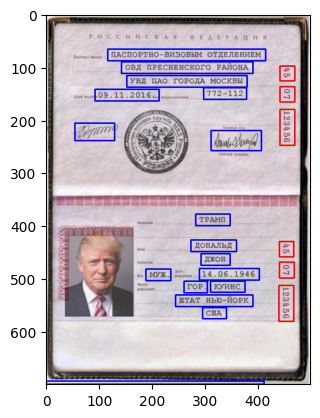

In [3]:
pl.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
pl.show()

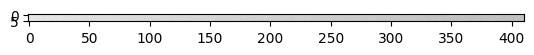

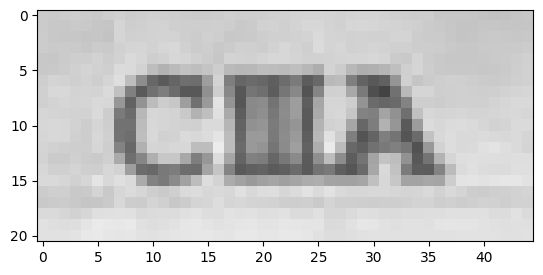

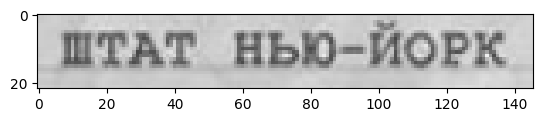

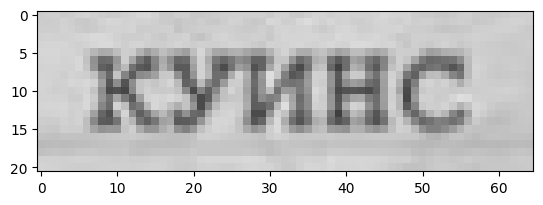

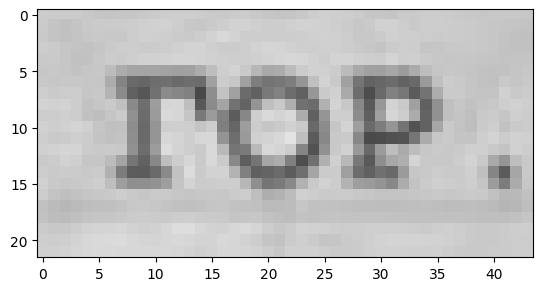

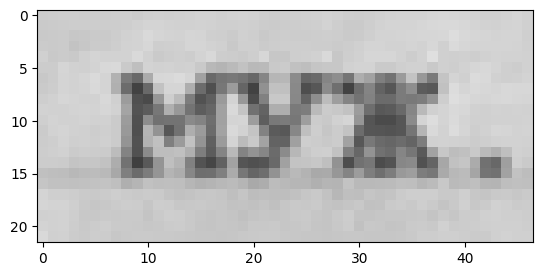

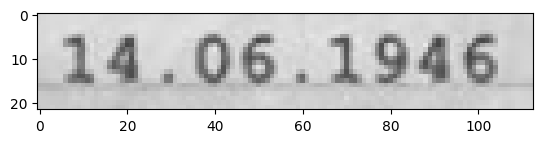

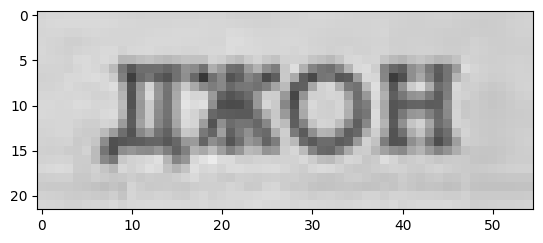

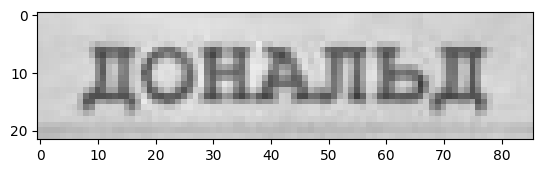

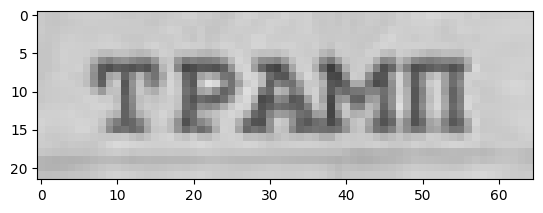

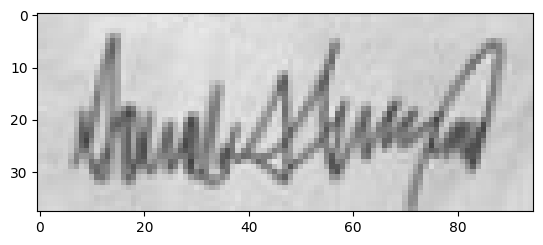

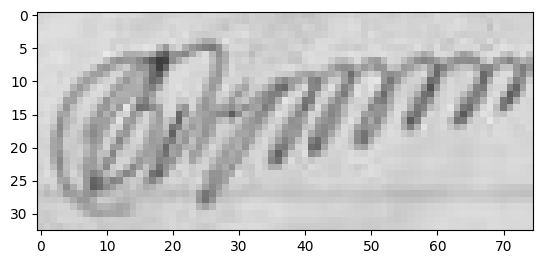

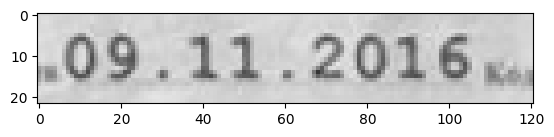

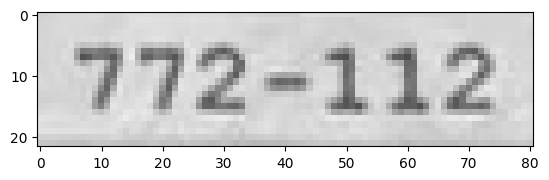

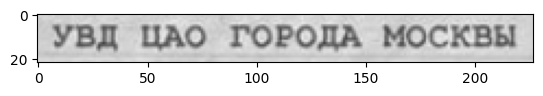

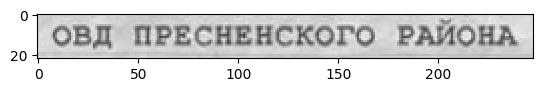

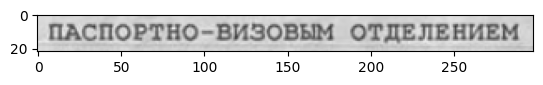

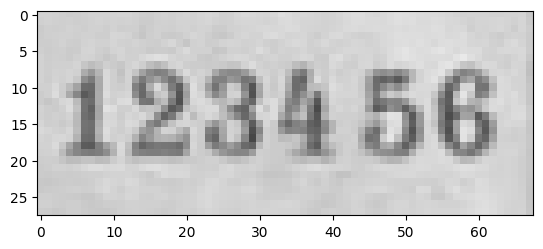

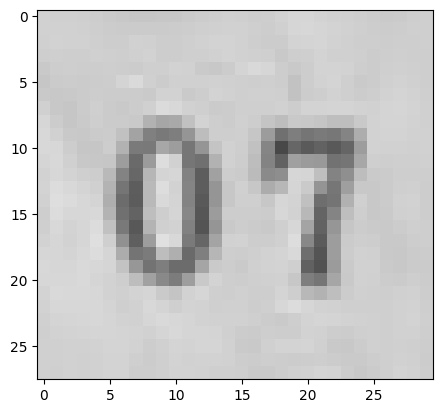

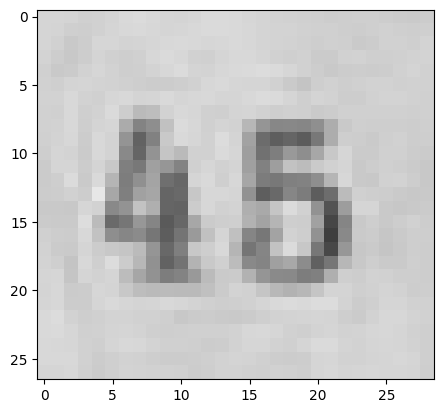

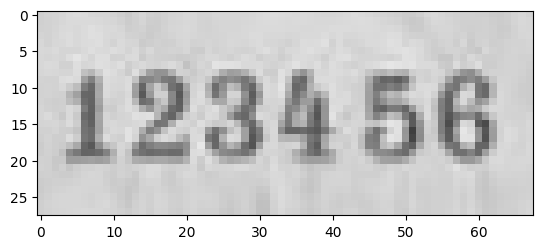

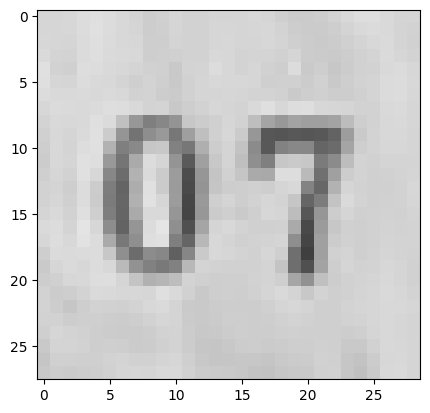

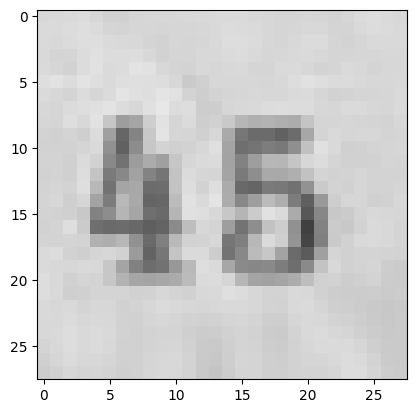

In [4]:
for i in horizontal_images:
    pl.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    pl.show()
for i in vertical_images:
    pl.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    pl.show()

# First, let's try to recognize text using the library tesseractocr

In [5]:
import pytesseract
import re

text = []
for i in horizontal_images:
    text.append(pytesseract.image_to_string(i, lang='rus', config='--oem 3 --psm 6'))
for i in vertical_images:
    text.append(pytesseract.image_to_string(i, lang='rus', config='--oem 3 --psm 6'))

text = [line.rstrip() for line in text]
#for i in text:
    #text[i] = re.sub(r"[—‹*'‚.<>`,-:›° ]", "", text[i])

print(f'Пасспорт: серия {text[-1]} {text[-2]} номер {text[-3]}')
print(f'выдан {text[-7]} {text[-8]} {text[-9]} код подразделения {text[-10]} дата {text[-11]}')
print(f'ФИО: {text[-16]} {text[-15]} {text[-14]}')
print(f'Дата рождения {text[-17]} ')

Пасспорт: серия 45 07 номер 123456
выдан ПАСПОРТНО-ВИЗОВЫМ ОТДЕЛЕНИЕМ ОВД ПРЕСНЕНСКОГО РАЙОНА УВД ЦАО ГОРОДА МОСКВЫ код подразделения 772-112 дата .09.11.2016 ,.
ФИО: джЖон ДОНАЛЬД "ТРАМП
Дата рождения 14.06.1946 
